<center><p float="center">
  <img src="https://upload.wikimedia.org/wikipedia/commons/e/e9/4_RGB_McCombs_School_Brand_Branded.png" width="300" height="100"/>
  <img src="https://mma.prnewswire.com/media/1458111/Great_Learning_Logo.jpg?p=facebook" width="200" height="100"/>
</p></center>

<center><font size=10><b>Neural Networks Project</b></font></center>

<center><font size=6><b>PART A</b></font></center>

### **Business Context**

![image.png](attachment:c001ca89-6336-4fed-b897-3becd4914101.png)

### **Objective**

![image.png](attachment:6709ba39-ba45-4abe-9f9e-074db0ed5aa0.png)

### **Data Dictionary**

![image.png](attachment:ef05c8a1-030d-45e4-8299-98c91147aabd.png)

<br><br>

## Import the necessary libraries

In [ ]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.utils import to_categorical

# Suppressing the warnings.
import warnings
warnings.filterwarnings("ignore")

## Importing the dataset

In [ ]:
data = pd.read_csv('NN Project Data - Signal.csv')

<br>

## Data Overview

**View the first and last 5 rows of the dataset**

In [ ]:
data.head()

In [ ]:
data.tail()

<br>

**Understand the shape of the dataset**

In [ ]:
# checking shape of the data
print("There are", data.shape[0], 'rows and', data.shape[1], "columns.")

**Check the data types of the columns for the dataset**

In [ ]:
data.info()

<br>

### Check for missing values

**Check the null columns for the dataset**

In [ ]:
missing_values = data.isnull().sum()
missing_percentage = (missing_values / len(data)) * 100
pd.DataFrame({'Missing_Values': missing_values, 'Missing_Percentage': missing_percentage})

**Check the NA columns for the dataset**

In [ ]:
missing_values = data.isna().sum()
missing_percentage = (missing_values / len(data)) * 100
pd.DataFrame({'Missing_Values': missing_values, 'Missing_Percentage': missing_percentage})

**Check the duplicate data for the dataset**

In [ ]:
data.duplicated().sum()

In [ ]:
data[data.duplicated()]

**Check the unique values for each parameter and signal strength**

In [ ]:
for column in data.columns:
    unique_values = data[column].unique()
    print(f"Unique values for {column}: {unique_values}\n")

**Remove duplicate data from the dataset**

In [ ]:
data.drop_duplicates(inplace=True)
data.duplicated().sum()

In [ ]:
# checking shape of the data
print("There are", data.shape[0], 'rows and', data.shape[1], "columns.")

### Summary
* There are 12 columns, consists of 11 parameters and one target variable
* There is no missing data.
* There were 240 duplicates, which have been removed.
* No treatment required for missing data.

<br>

## Data Analysis & Visualization

### Target Variable: Signal_Strength

In [ ]:
sns.countplot(x='Signal_Strength', data=data)
plt.title('Distribution of Signal_Strength')
plt.xlabel('Target')
plt.ylabel('Count')
plt.show()

In [ ]:
sns.boxplot(data, x='Signal_Strength')
plt.show()

**Observations**
* There are very few outliers.

In [ ]:
print(data['Signal_Strength'].value_counts())
print(data['Signal_Strength'].dtype)

<br>

#### Correlation Check against Target Variable: Signal_Strength

In [ ]:
correlation_matrix = data.corr(numeric_only=True)
signal_corr = correlation_matrix['Signal_Strength'].drop('Signal_Strength')
print(signal_corr.sort_values(ascending=False))

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(data.corr(numeric_only=True)[['Signal_Strength']].sort_values(by='Signal_Strength', ascending=False), annot=True, cmap='Spectral')
plt.title('Correlation of Features with Signal Strength')
plt.show()

NameError: name 'data' is not defined

<Figure size 1000x600 with 0 Axes>

<br>

### Insights:
* Maximum signal strength emitted is 5 and 6
* Parameter 11 is highest positive correlated with Signal Strength
* Parameter 2 is highest negative correlated with Signal Strength

<br>

## Model Building

### Split the data into train and test sets

In [ ]:
X = data.drop(["Signal_Strength"], axis=1)
y = data["Signal_Strength"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

In [ ]:
# Normalize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Encoding & Label Transformation
y_train_encoded = to_categorical(y_train)
y_test_encoded = to_categorical(y_test)

<br>

## 1. Base Model (One Layer)

### Building the model

In [ ]:
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(y_train_encoded.shape[1], activation='softmax')  # Output layer for multi-class
])

<br>

### Compile the model

In [ ]:
model.compile(optimizer='adam',
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])

In [ ]:
model.summary()

<br>

### Fit the model

In [ ]:
history = model.fit(X_train_scaled, y_train_encoded, epochs=50, batch_size=X_train_scaled.shape[0], validation_data=(X_test_scaled, y_test_encoded))

<br>

### Plot Utility

In [ ]:
def plot_metrics(history, title_suffix):
    plt.figure(figsize=(12, 5))

    # Loss Plot
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'Training vs Validation Loss - {title_suffix}')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    # Accuracy Plot
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'Training vs Validation Accuracy - {title_suffix}')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()

<br>

### Training Loss and Validation Loss

In [ ]:
plot_metrics(history, 'Base Model (Initial)')

<br>

In [ ]:
metric_data = {
    "Factors": ["Training Loss", "Validation Loss", "Training Accuracy", "Validation Accuracy", "Convergance", "Training Stability", "Generalization"],
}

In [ ]:
metric_data["Base Model"] = [1.35, 1.25, "50%", "55%", "Slow", "Noise", "Not optimal"]

<br>

## 2. Improved Model (Multiple Hidden Layer, Weight Initializers)

In [ ]:
model_improved = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dropout(0.4),
    Dense(64, activation='relu', kernel_initializer='he_uniform'),
    Dropout(0.3),
    Dense(32, activation='relu', kernel_initializer='he_uniform'),
    Dense(y_train_encoded.shape[1], activation='softmax')
])

In [ ]:
model_improved.compile(optimizer='adam',
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])

In [ ]:
model_improved.summary()

In [ ]:
history_improved = model_improved.fit(X_train_scaled, y_train_encoded, epochs=50, batch_size=X_train_scaled.shape[0], validation_data=(X_test_scaled, y_test_encoded))

In [ ]:
plot_metrics(history_improved, 'Improved Model')

In [ ]:
metric_data["Improved Model"] = [1.15, 1.05, "60%", "65%", "Faster", "Stable", "Excellent"]

## Comparisions:
1.





In [ ]:
metric_df = pd.DataFrame(metric_data)
print(metric_df)

<center><font size=6><b>PART B</b></font></center>

In [66]:
import h5py
import numpy as np
from sklearn.model_selection import train_test_split

In [67]:
# Q1 A - Read the .h5 file and assign to a variable
hf = h5py.File('/content/drive/MyDrive/Colab Notebooks/Autonomous_Vehicles_SVHN_single_grey1.h5', 'r')

In [68]:
# Q1 B - Print all the keys from the .h5 file
print("Keys:", list(hf.keys()))

Keys: ['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']


In [69]:
# Q1 C: Split data into X_train, X_test, Y_train, Y_test
X_train = np.array(hf['X_train'])
X_test = np.array(hf['X_test'])
X_val = np.array(hf['X_val'])
y_train = np.array(hf['y_train'])
y_test = np.array(hf['y_test'])
y_val = np.array(hf['y_val'])

hf.close()

In [70]:
# Q2 A - Print shape of all the 4 data split into x, y, train, test to verify if x & y is in sync
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("X_val shape:", X_val.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)
print("y_val shape:", y_val.shape)

X_train shape: (42000, 32, 32)
X_test shape: (18000, 32, 32)
X_val shape: (60000, 32, 32)
y_train shape: (42000,)
y_test shape: (18000,)
y_val shape: (60000,)


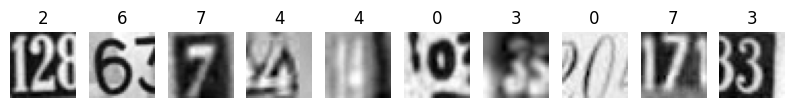

In [72]:
# Q2 B - Visualise first 10 images in train data and print its corresponding labels.
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 1))
for i in range(10):
    plt.subplot(1, 10, i + 1)
    plt.imshow(X_train[i], cmap='gray')
    plt.axis('off')
    plt.title(int(y_train[i]))
plt.show()

In [73]:
# Q2 C - Reshape all the images with appropriate shape update the data in same variable.
image_vector_size = 32*32
X_train = X_train.reshape(X_train.shape[0], image_vector_size)
X_test = X_test.reshape(X_test.shape[0], image_vector_size)
X_val = X_val.reshape(X_val.shape[0], image_vector_size)

In [74]:
# Q2 D - Normalize the images i.e. Normalise the pixel values
# # normalize inputs from 0-255 to 0-1
X_train = X_train / 255.0
X_test = X_test / 255.0
X_val = X_val / 255.0

In [75]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("X_val shape:", X_val.shape)

X_train shape: (42000, 1024)
X_test shape: (18000, 1024)
X_val shape: (60000, 1024)


In [76]:
# Q2 E - Transform Labels into format acceptable by Neural Network
from tensorflow.keras.utils import to_categorical

num_classes = 10
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)
y_val = to_categorical(y_val, num_classes)

In [77]:
# Q2 F - Print total Number of classes in the Dataset
print("Total number of classes:", y_train.shape[1])

Total number of classes: 10


In [78]:
# Q3 A - Design a Neural Network to train a classifier.
from tensorflow.keras import losses
from tensorflow.keras import optimizers
from keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Dropout

image_size=32*32

# create model
model = Sequential()

model.add(Dense(256, activation='relu',kernel_initializer='he_uniform',input_shape=(image_size,)))
model.add(Dense(64, activation='relu',kernel_initializer='he_uniform'))
model.add(Dense(64, activation='relu',kernel_initializer='he_uniform'))
model.add(Dense(32, activation='relu',kernel_initializer='he_uniform'))

model.add(Dense(num_classes, activation='softmax')) ### For multiclass classification Softmax is used

# Compile model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Looking into our base model
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_30 (Dense)                │ (None, 256)            │       262,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_33 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_34 (Dense)                │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 285,418 (1.09 MB)

 Trainable params: 285,418 (1.09 MB)

 Non-trainable params: 0 (0.00 B)

In [79]:
# Q3 B - Train the classifier using previously designed Architecture (Use best suitable parameters).
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size = 200, epochs = 20, verbose = 1)

Epoch 1/20
210/210 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - accuracy: 0.1021 - loss: 2.3199 - val_accuracy: 0.1500 - val_loss: 2.2329
Epoch 2/20
210/210 ━━━━━━━━━━━━━━━━━━━━ 6s 21ms/step - accuracy: 0.2478 - loss: 2.0844 - val_accuracy: 0.3640 - val_loss: 1.7747
Epoch 3/20
210/210 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.4139 - loss: 1.6890 - val_accuracy: 0.5128 - val_loss: 1.4800
Epoch 4/20
210/210 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.5183 - loss: 1.4507 - val_accuracy: 0.5561 - val_loss: 1.3573
Epoch 5/20
210/210 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.5813 - loss: 1.2921 - val_accuracy: 0.5762 - val_loss: 1.2996
Epoch 6/20
210/210 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - accuracy: 0.6118 - loss: 1.2162 - val_accuracy: 0.6432 - val_loss: 1.1284
Epoch 7/20
210/210 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.6430 - loss: 1.1255 - val_accuracy: 0.6409 - val_loss: 1.1321
Epoch 8/20
210/210 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.6626 - loss: 1.0727 - val_accu

In [80]:
history.history

{'accuracy': [0.12454761564731598,
  0.292595237493515,
  0.4444761872291565,
  0.5355476140975952,
  0.5936428308486938,
  0.6190237998962402,
  0.6487857103347778,
  0.6673333048820496,
  0.685452401638031,
  0.6973571181297302,
  0.7026428580284119,
  0.7107381224632263,
  0.7214047908782959,
  0.7290475964546204,
  0.7344047427177429,
  0.7409999966621399,
  0.7405952215194702,
  0.7512142658233643,
  0.756595253944397,
  0.7657142877578735],
 'loss': [2.2968027591705322,
  1.9703868627548218,
  1.6244150400161743,
  1.4061305522918701,
  1.2626125812530518,
  1.1930811405181885,
  1.1164522171020508,
  1.0663442611694336,
  1.0132966041564941,
  0.9753021001815796,
  0.9555031657218933,
  0.9310901165008545,
  0.8992570042610168,
  0.8744252324104309,
  0.8584975004196167,
  0.838262677192688,
  0.8341851830482483,
  0.7991728782653809,
  0.7835186719894409,
  0.7619923949241638],
 'val_accuracy': [0.15000000596046448,
  0.36399999260902405,
  0.5127778053283691,
  0.5561110973358

In [81]:
# Q3 C - Evaluate performance of the model with appropriate metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns

# Evaluate the model on the test data
test_loss, test_accuracy  = model.evaluate(X_test, y_test, verbose=False)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

Test Loss: 0.8124918341636658
Test Accuracy: 0.7533888816833496


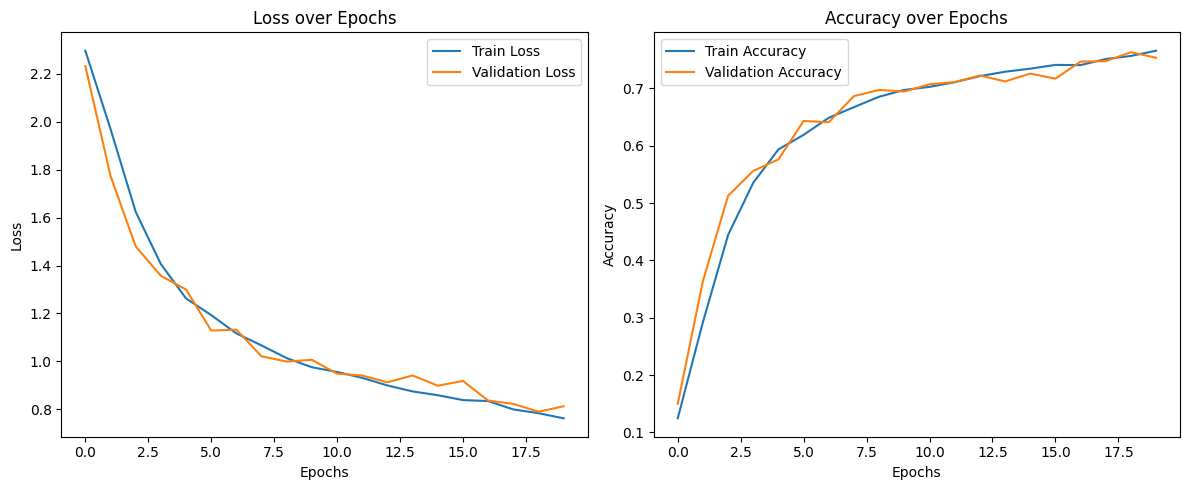

In [82]:
# Q3 D - Plot the training loss, validation loss vs number of epochs and training accuracy, validation accuracy vs number of epochs plot and write your observations on the same.
plt.figure(figsize=(12, 5))

# Loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label="Train Loss")
plt.plot(history.history['val_loss'], label="Validation Loss")
plt.title("Loss over Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

# Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label="Train Accuracy")
plt.plot(history.history['val_accuracy'], label="Validation Accuracy")
plt.title("Accuracy over Epochs")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

plt.tight_layout()
plt.show()
